<a href="https://colab.research.google.com/github/mohansameer1983/Plant-Seedlings-Image-Classification-CNN/blob/main/Plant_Seedlings_Image_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Github Project - 
https://github.com/mohansameer1983/Plant-Seedlings-Image-Classification-CNN

In [440]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.4.1'

In [441]:
# Import necessary libraries

import numpy as np    
import pandas as pd

import cv2
from google.colab.patches import cv2_imshow      # To show images using cv2 module
from tensorflow.keras.utils import to_categorical

from skimage import data, io                     # Import skimage library (data - Test images and example data.
from sklearn.model_selection import train_test_split
import seaborn as sns                                                 #                          io - Reading, saving, and displaying images.) 
import matplotlib.pyplot as plt
%matplotlib inline                 

import os                                        # This module provides a portable way of using operating system dependent functionality.
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import warnings
# Suppress warnings
warnings.filterwarnings('ignore')

## Loading Image Dataset and Label Data

In [442]:
# Mount Google drive so dataset can be accessed
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [443]:
# Load image data
file_path = '/content/drive/My Drive/Colab Notebooks/data/images.npy'

Xraw_images = np.load(file_path)

In [444]:
# Load labels
y = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/Labels.csv')

In [445]:
# Shape of image and Label dataset
print('Image Array Shape - ', Xraw_images.shape)
print('Label DF Shape - ', y.shape)

Image Array Shape -  (4750, 128, 128, 3)
Label DF Shape -  (4750, 1)


In [446]:
# Distribution of labels
y.value_counts()

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
dtype: int64

In [447]:
# Count number of classes
y.nunique()

Label    12
dtype: int64

## Visualize Images

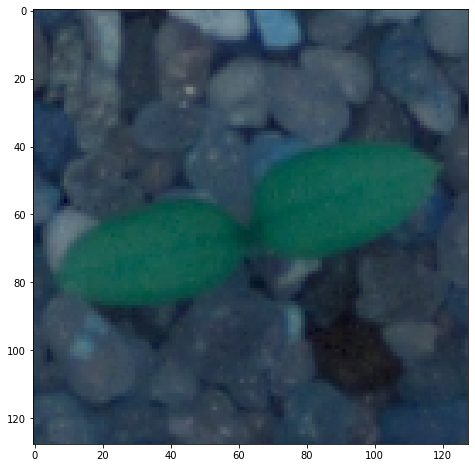

In [448]:
i=2000
plt.figure(figsize = (8,8))    
plt.imshow(Xraw_images[i], cmap='gray');

In [449]:
# Image Shape
H, W = Xraw_images[i].shape[:2]
# Displaying the height and width 
print("Height = {},  Width = {}".format(H, W)) 

Height = 128,  Width = 128


In [450]:
print('Image Matrix: \n',  Xraw_images[i])
print(type(Xraw_images[i]))

Image Matrix: 
 [[[ 44  64  88]
  [ 43  65  88]
  [ 41  66  88]
  ...
  [ 76  97 112]
  [ 75  96 111]
  [ 75  96 110]]

 [[ 45  61  87]
  [ 42  63  89]
  [ 36  60  85]
  ...
  [ 75  96 110]
  [ 75  95 109]
  [ 75  95 108]]

 [[ 44  58  82]
  [ 40  58  84]
  [ 37  59  84]
  ...
  [ 78  97 111]
  [ 74  94 108]
  [ 76  95 108]]

 ...

 [[ 38  58  79]
  [ 39  59  80]
  [ 42  63  82]
  ...
  [ 38  61  86]
  [ 40  64  84]
  [ 38  62  82]]

 [[ 37  57  77]
  [ 43  64  82]
  [ 47  68  85]
  ...
  [ 37  59  81]
  [ 40  64  80]
  [ 38  63  78]]

 [[ 43  63  81]
  [ 45  67  84]
  [ 46  69  85]
  ...
  [ 39  60  79]
  [ 43  67  80]
  [ 45  69  80]]]
<class 'numpy.ndarray'>


# Data Pre-Processing

## Grayscaling Images

In [451]:
# Convert image to grayscale. The second argument in the following step is cv2.COLOR_BGR2GRAY, which converts colour image to grayscale.

images_gray = np.zeros(Xraw_images.shape[:-1], dtype=Xraw_images.dtype)
for i, img in enumerate(Xraw_images):
    images_gray[i] = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

images_gray = images_gray.reshape(images_gray.shape[0], 128, 128, 1)
# Shape of gray image dataset
print('Image Array Shape - ', images_gray.shape)

Image Array Shape -  (4750, 128, 128, 1)


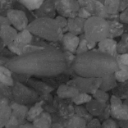

In [452]:
# Visualize image after grayscaling
cv2_imshow(images_gray[2020])

## Gaussian Blurring

In [453]:
# Apply Gaussian blurring to all images
images_blur = np.zeros(images_gray.shape[:-1], dtype=images_gray.dtype)
for i, img in enumerate(images_gray):
    images_blur[i] = cv2.GaussianBlur(img, (5, 5), 0)

images_blur = images_blur.reshape(images_blur.shape[0], 128, 128, 1)
# Shape of blur image dataset
print('Image Array Shape - ', images_blur.shape)

Image Array Shape -  (4750, 128, 128, 1)


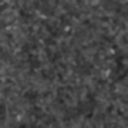

In [454]:
# Visualize image after normalization and blurring
cv2_imshow(images_blur[i])

In [455]:
print('Image Matrix: \n',  images_blur[i])
print(type(images_blur[i]))

Image Matrix: 
 [[[64]
  [66]
  [74]
  ...
  [88]
  [92]
  [94]]

 [[69]
  [72]
  [80]
  ...
  [85]
  [87]
  [88]]

 [[84]
  [88]
  [93]
  ...
  [77]
  [74]
  [74]]

 ...

 [[72]
  [72]
  [71]
  ...
  [70]
  [67]
  [66]]

 [[77]
  [77]
  [75]
  ...
  [74]
  [75]
  [77]]

 [[80]
  [79]
  [77]
  ...
  [77]
  [81]
  [83]]]
<class 'numpy.ndarray'>


**Note -** When we used blurred images, accuracy result was totally bad. So, we discarded this step, and instead will work on normalized images array only.

## Normalization

In [456]:
# Normalize the data
images_normalize = images_gray.astype('float32') / 255.0
print('Normalize Image Array Shape - ', images_normalize.shape)

Normalize Image Array Shape -  (4750, 128, 128, 1)


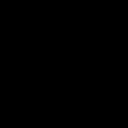

In [457]:
# Visualize image after normalization
cv2_imshow(images_normalize[2000])

## One-Hot Encode Label Vector

In [458]:
#One-Hot Encoding using sci-kit learn to convert strings into Integer
from sklearn.preprocessing import LabelEncoder
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)

# Convert integer encoded labels to Keras supported one-hot encode vector
y_encoded = to_categorical(integer_encoded, num_classes=12)

print("Shape of y_encoded:", y_encoded.shape)
print("One value of y_encoded:", y_encoded[0])

Shape of y_encoded: (4750, 12)
One value of y_encoded: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


## Split Data

In [459]:
# Split data into test and train to build the model. 70% is train data
X_train, X_test, y_train, y_test = train_test_split(images_normalize, y_encoded, test_size=0.3, random_state=0)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

### Print shape of the data

In [460]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

print(y_train[0])

(3325, 128, 128, 1)
(3325, 12)
(712, 128, 128, 1)
(712, 12)
(713, 128, 128, 1)
(713, 12)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Check train, validation and test sets, if in compatible shapes
We can see from above shape details, that all three are already compatible.

### Initialize a sequential model 

In [461]:
from tensorflow.keras.models import Sequential          # Sequential groups a linear stack of layers into a tf.keras.Model.
from tensorflow.keras.layers import Conv2D              # This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
from tensorflow.keras.layers import MaxPooling2D, GlobalMaxPool2D
from tensorflow.keras.layers import Flatten             # Flattens the input. Does not affect the batch size.
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout      # Dropout: Applies Dropout to the input.
                                                        # Dense: Just your regular densely-connected NN layer.

In [462]:

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), strides = (1,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(GlobalMaxPool2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(12, activation="softmax"))


### Compile and fit the model

In [463]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Fit the model
model.fit( x=X_train, y=y_train, batch_size=30, epochs=20, validation_split = 0.3)

Epoch 1/20
78/78 [==============================] - 4s 30ms/step - loss: 2.7767 - accuracy: 0.1131 - val_loss: 2.4828 - val_accuracy: 0.1423
Epoch 2/20
78/78 [==============================] - 2s 27ms/step - loss: 2.3452 - accuracy: 0.2132 - val_loss: 2.4386 - val_accuracy: 0.1293
Epoch 3/20
78/78 [==============================] - 2s 28ms/step - loss: 2.1013 - accuracy: 0.2893 - val_loss: 2.3992 - val_accuracy: 0.1403
Epoch 4/20
78/78 [==============================] - 2s 27ms/step - loss: 1.8930 - accuracy: 0.3388 - val_loss: 2.6563 - val_accuracy: 0.1523
Epoch 5/20
78/78 [==============================] - 2s 28ms/step - loss: 1.7412 - accuracy: 0.4021 - val_loss: 2.7662 - val_accuracy: 0.1062
Epoch 6/20
78/78 [==============================] - 2s 28ms/step - loss: 1.6816 - accuracy: 0.4181 - val_loss: 2.6138 - val_accuracy: 0.1473
Epoch 7/20
78/78 [==============================] - 2s 28ms/step - loss: 1.6265 - accuracy: 0.4154 - val_loss: 2.0919 - val_accuracy: 0.2244
Epoch 8/20
78

### Final loss and accuracy on validation dataset

In [464]:
model.evaluate(X_val, y_val)

23/23 [==============================] - 0s 10ms/step - loss: 1.5047 - accuracy: 0.5540


[1.5047038793563843, 0.5539972186088562]

In [465]:
# Predicting test data. To generate confusion matrix, need to convert both predictions and test labels as single digit, and not as vectors
rounded_pred = model.predict_classes(X_test)

rounded_test_labels = np.argmax(y_test, axis=1)

In [466]:
rounded_pred

array([ 0,  5, 11, 10, 11,  6,  3,  7,  1,  4,  3,  4,  8, 11,  8,  0,  5,
        5,  0,  8, 11,  4,  6,  6,  9, 11,  1,  3,  2,  5, 11,  4,  6,  3,
        4,  6,  5,  2,  1,  8,  5, 11,  9,  6,  2,  3,  3,  3,  3,  4,  2,
        3,  6,  2, 11,  5,  2,  6,  1, 11,  6,  7,  6, 10, 11, 11,  7,  6,
        1,  5,  3, 11,  3,  1,  6,  6,  6,  6,  6, 11, 11, 10,  2,  7,  5,
        5, 11,  6,  5,  6,  3, 10, 11,  1,  5, 10,  3, 11,  6,  6,  6, 11,
        3,  3,  6, 10,  0,  6,  8,  7, 10,  2,  7,  2,  7,  6,  6,  3,  1,
        3,  6, 11,  1,  2, 10,  4,  5,  7, 10, 10, 10,  6,  3,  4,  2, 11,
       10,  5,  6, 11,  7,  9,  1,  9,  0,  3,  5,  1,  9,  4,  3,  6,  5,
       10,  4,  3,  0,  2, 11,  0,  6,  2,  1,  1,  6,  4,  5,  2,  4,  5,
        2,  6,  0,  6,  3,  1,  1,  1,  3, 11,  7, 11,  3,  3,  4,  6, 10,
        1, 10,  3,  3,  8,  4, 11,  2, 11,  6,  6,  1,  1,  4,  2,  5,  3,
        1,  5,  7,  1,  5,  1,  3, 11,  0, 10,  7,  8,  6,  9,  3, 11,  7,
        8, 10,  7,  1, 10

### Confusion Matrix

In [467]:
from sklearn.metrics import classification_report, confusion_matrix
print("=== Confusion Matrix ===")
cm = confusion_matrix(rounded_test_labels, rounded_pred)
print(cm)

=== Confusion Matrix ===
[[ 9  0  3  0  4  2 19  0  0  0  0  0]
 [ 0 33  1  1  0  0  0  8  0  0  6  1]
 [ 0  4 29  2  3  1  1  8  0  0  3  0]
 [ 0  1  0 57  2  4  5  5  7  5  6  3]
 [ 2  0  2  0 22  2  1  3  1  0  0  2]
 [ 0  8  4  6  9 35  3  5  0  2  6  7]
 [13  0  3  2  3  8 63  0  3  0  0  1]
 [ 0  1  0  0  0  0  0 20  0  0  0  5]
 [ 4  0  1  8  6  2 18  9 22  4  2  1]
 [ 0  3  1  9  0  2  1  4  4  6 10  0]
 [ 0 10  0  2  1  1  0  4  1  0 36  5]
 [ 1  1  0  2  6  3  1  1  0  0  0 45]]


### Final loss and accuracy

In [468]:
model.evaluate(X_test, y_test)

23/23 [==============================] - 0s 10ms/step - loss: 1.4453 - accuracy: 0.5295


[1.4452894926071167, 0.5294944047927856]

# Let's visualize prediction results

Predicted label: 11
Softmax Outputs: [[3.9106916e-07 4.3527678e-05 4.4213706e-08 3.4171364e-05 1.4707913e-05
  3.6530564e-06 4.9239003e-07 2.5171502e-02 9.5566618e-05 2.6830401e-06
  1.8456449e-06 9.7463131e-01]]
0.9999999


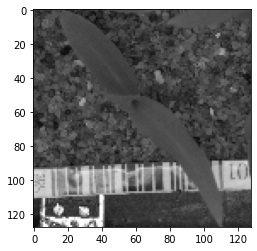

In [469]:
# Predict X_test[2]
plt.imshow(X_test[2].reshape(128, 128), cmap='gray')
y_pred = model.predict(X_test[2].reshape(1, 128, 128, 1))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

Predicted label: 10


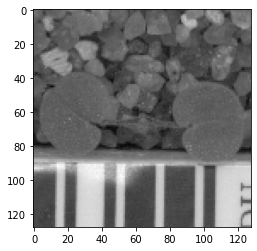

In [470]:
# Predict X_test[3]
plt.imshow(X_test[3].reshape(128, 128), cmap='gray')
y_pred = model.predict(X_test[3].reshape(1, 128, 128, 1))
print("Predicted label:", y_pred.argmax())

Predicted label: 3


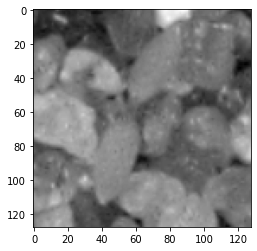

In [471]:
# Predict X_test[33]
plt.imshow(X_test[33].reshape(128, 128), cmap='gray')
y_pred = model.predict(X_test[33].reshape(1, 128, 128, 1))
print("Predicted label:", y_pred.argmax())

Predicted label: 5


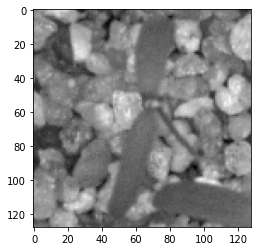

In [472]:
# Predict X_test[36]
plt.imshow(X_test[36].reshape(128, 128), cmap='gray')
y_pred = model.predict(X_test[36].reshape(1, 128, 128, 1))
print("Predicted label:", y_pred.argmax())

Predicted label: 11


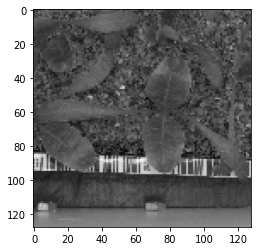

In [473]:
# Predict X_test[59]
plt.imshow(X_test[59].reshape(128, 128), cmap='gray')
y_pred = model.predict(X_test[59].reshape(1, 128, 128, 1))
print("Predicted label:", y_pred.argmax())

# Let's Do all this without grayscaling of images

In [474]:
# Split data into test and train to build the model. 70% is train data
X_train, X_test, y_train, y_test = train_test_split(Xraw_images, y_encoded, test_size=0.3, random_state=0)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [475]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

print(y_train[0])

(3325, 128, 128, 3)
(3325, 12)
(712, 128, 128, 3)
(712, 12)
(713, 128, 128, 3)
(713, 12)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [476]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), strides = (1,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(GlobalMaxPool2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(12, activation="softmax"))

# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Fit the model
model.fit( x=X_train, y=y_train, batch_size=35, epochs=20, validation_split = 0.3)

model.evaluate(X_val, y_val)

Epoch 1/20
67/67 [==============================] - 3s 33ms/step - loss: 2.5547 - accuracy: 0.1874 - val_loss: 2.7109 - val_accuracy: 0.1453
Epoch 2/20
67/67 [==============================] - 2s 29ms/step - loss: 1.7643 - accuracy: 0.4000 - val_loss: 2.1896 - val_accuracy: 0.2876
Epoch 3/20
67/67 [==============================] - 2s 29ms/step - loss: 1.2982 - accuracy: 0.5753 - val_loss: 1.4502 - val_accuracy: 0.4960
Epoch 4/20
67/67 [==============================] - 2s 29ms/step - loss: 0.9922 - accuracy: 0.6863 - val_loss: 1.3613 - val_accuracy: 0.5140
Epoch 5/20
67/67 [==============================] - 2s 29ms/step - loss: 0.7643 - accuracy: 0.7543 - val_loss: 1.6234 - val_accuracy: 0.4990
Epoch 6/20
67/67 [==============================] - 2s 29ms/step - loss: 0.6979 - accuracy: 0.7644 - val_loss: 1.0410 - val_accuracy: 0.6663
Epoch 7/20
67/67 [==============================] - 2s 29ms/step - loss: 0.6376 - accuracy: 0.7891 - val_loss: 0.8069 - val_accuracy: 0.7224
Epoch 8/20
67

[0.47331106662750244, 0.8499298691749573]

In [477]:
print("=== Confusion Matrix ===")
cm = confusion_matrix(rounded_test_labels, rounded_pred)
print(cm)

=== Confusion Matrix ===
[[ 9  0  3  0  4  2 19  0  0  0  0  0]
 [ 0 33  1  1  0  0  0  8  0  0  6  1]
 [ 0  4 29  2  3  1  1  8  0  0  3  0]
 [ 0  1  0 57  2  4  5  5  7  5  6  3]
 [ 2  0  2  0 22  2  1  3  1  0  0  2]
 [ 0  8  4  6  9 35  3  5  0  2  6  7]
 [13  0  3  2  3  8 63  0  3  0  0  1]
 [ 0  1  0  0  0  0  0 20  0  0  0  5]
 [ 4  0  1  8  6  2 18  9 22  4  2  1]
 [ 0  3  1  9  0  2  1  4  4  6 10  0]
 [ 0 10  0  2  1  1  0  4  1  0 36  5]
 [ 1  1  0  2  6  3  1  1  0  0  0 45]]


In [478]:
model.evaluate(X_test, y_test)

23/23 [==============================] - 0s 7ms/step - loss: 0.4023 - accuracy: 0.8581


[0.4022555947303772, 0.858146071434021]

Predicted label: 7
Softmax Outputs: [[4.40248102e-03 5.58856875e-03 7.62634398e-03 4.94942209e-03
  8.02916288e-03 1.20215923e-01 5.07551653e-04 6.57554269e-01
  4.21010714e-04 3.35654840e-02 1.05678976e-01 5.14607951e-02]]
0.9999999


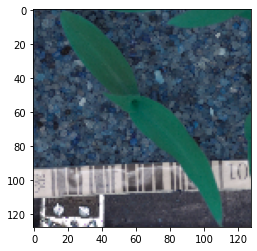

In [479]:
# Predict X_test[2]
plt.imshow(X_test[2], cmap='gray')
y_pred = model.predict(X_test[2].reshape(1, 128, 128, 3))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

Predicted label: 10
Softmax Outputs: [[1.8789486e-06 1.5251894e-05 5.4760112e-05 3.8223472e-05 7.0407410e-08
  1.9016014e-04 4.9012266e-07 6.0908483e-06 1.8829113e-06 8.8450055e-05
  9.9960154e-01 1.2021625e-06]]
1.0


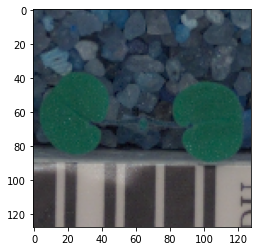

In [480]:
# Predict X_test[3]
plt.imshow(X_test[3], cmap='gray')
y_pred = model.predict(X_test[3].reshape(1, 128, 128, 3))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

Predicted label: 8
Softmax Outputs: [[1.2289629e-05 5.3830049e-06 1.1071121e-05 7.5983241e-02 9.3525514e-06
  3.3216801e-04 1.1387115e-03 2.0525062e-05 9.1819727e-01 3.3202390e-03
  8.6329877e-05 8.8339054e-04]]
0.99999994


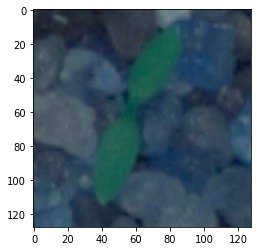

In [481]:
# Predict X_test[33]
plt.imshow(X_test[33], cmap='gray')
y_pred = model.predict(X_test[33].reshape(1, 128, 128, 3))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

Predicted label: 5
Softmax Outputs: [[3.2517114e-06 9.4533505e-07 4.9853203e-05 6.3870057e-06 3.3613160e-05
  9.9968207e-01 7.2814597e-05 1.6865532e-05 5.9534800e-06 1.0364958e-05
  5.0261027e-05 6.7575325e-05]]
1.0


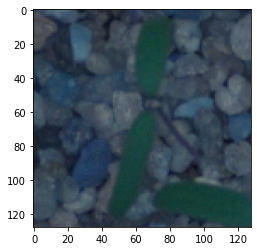

In [482]:
# Predict X_test[36]
plt.imshow(X_test[36], cmap='gray')
y_pred = model.predict(X_test[36].reshape(1, 128, 128, 3))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

Predicted label: 11
Softmax Outputs: [[1.26284908e-03 1.05289623e-01 8.16841552e-04 2.48093647e-03
  5.69047034e-03 2.15115724e-03 1.27322404e-04 1.40013069e-01
  3.05364698e-01 1.16217155e-02 1.18504995e-05 4.25169468e-01]]
1.0


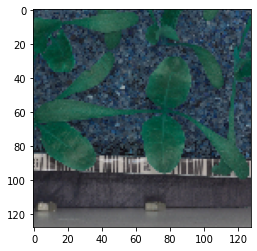

In [483]:
# Predict X_test[59]
plt.imshow(X_test[59], cmap='gray')
y_pred = model.predict(X_test[59].reshape(1, 128, 128, 3))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

**Conclusion** - From the above steps, we can see that converting images to gray scale not helped in achieving better result in this problem. And, using colored images accuracy result is higher.